In [11]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features,readDict, read_duration,checkForExist
import seaborn as sns
plt.rcParams['savefig.dpi'] = 200
Cat = [20, 21, 26, 333, 334, 335]
amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB']


In [ ]:
typ = 3
for did in NonCat:
    for amount in amountList:
        featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
for did in Cat:
    for amount in amountList:
        featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
amountList = [0,0.5,0.75,1,1.5,2,3,4,5,6]
for amount in amountList:
    for did in NonCat:
        cv_feature(did,cv,amount)
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
for amount in amountList:
    for did in Cat:
        cv_feature(did,cv,amount)

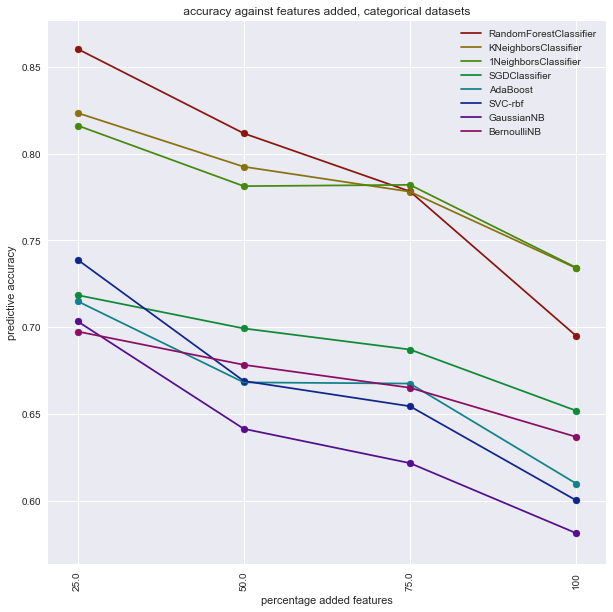

In [21]:
didList = Cat
scores = []
amountList = [0.25,0.5,0.75,1]
func = 'cvScoreFeatures5'
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
#             score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' accuracy against features added, categorical datasets ' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

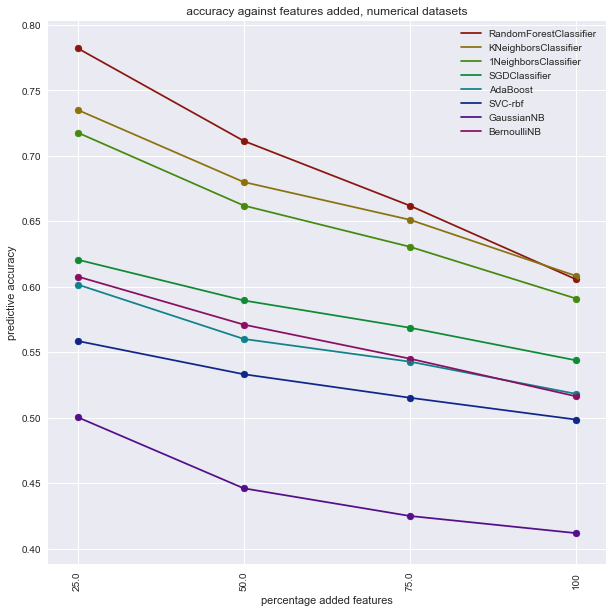

In [19]:
didList = NonCat
scores = []
amountList = [0.25,0.5,0.75,1]
func = 'cvScoreFeatures5'
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
#             score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' accuracy against features added, numerical datasets ' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

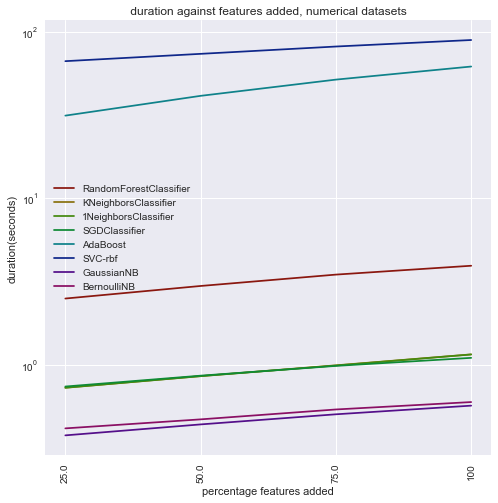

In [22]:
func = 'cvScoreFeatures4'
didList = NonCat
dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur2.append([])
    for j,x in enumerate(amountList):
        dur2[i].append(0) 
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur2[cs][i] = dur2[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
x_axis = range(0,len(dur2[0])) 
for i,x in enumerate(amountList):
    amountList[i] = x*100
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features added, numerical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

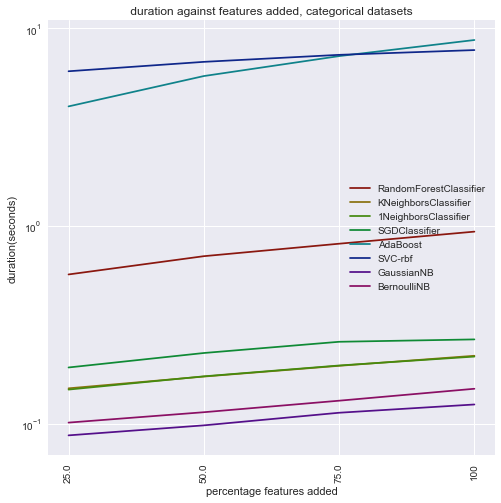

In [23]:
func = 'cvScoreFeatures4'
didList = Cat
dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur2.append([])
    for j,x in enumerate(amountList):
        dur2[i].append(0) 
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur2[cs][i] = dur2[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
x_axis = range(0,len(dur2[0])) 
for i,x in enumerate(amountList):
    amountList[i] = x*100
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features added, categorical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

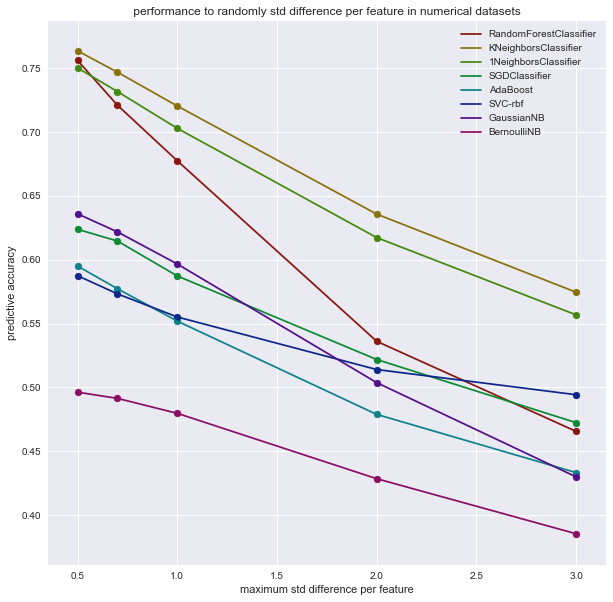

In [24]:
func = 'cvfeatureSTD1'
scores = []
amountList = [0.5,0.7,1,2,3]
didList = NonCat#[12,14,16,18,22,28,30,32,36,37]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()


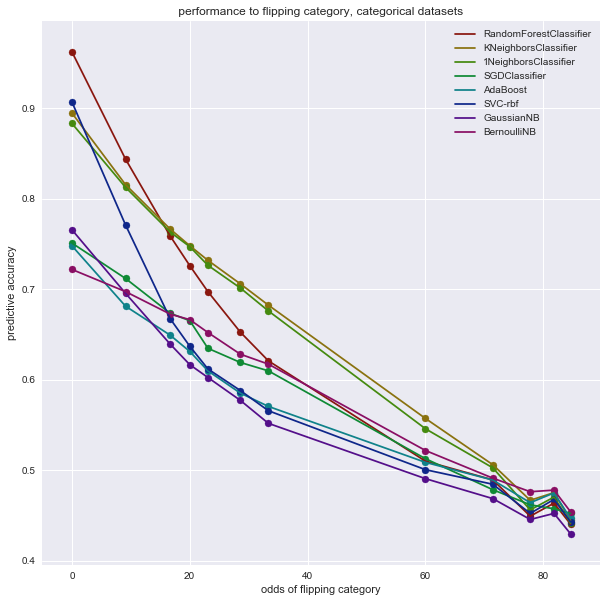

In [7]:
func = 'cvfeatureCAT2'
scores = []
score1 = []
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
didList = [20, 21, 26, 333, 334, 335]#, 40668, 4135, 4534, 469, 46, 50]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
flipped = []
for i in amountList:
    if i > 0.5:
        flipped.append((1-1/(i+0.5))*100)
    else:
        flipped.append(0)
x_axis = flipped
fig, ax = plt.subplots()
_=plt.title(' performance to flipping category, categorical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('odds of flipping category')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

In [18]:
x_axis

[25.0, 50.0, 75.0, 100]